# Libreta de modelos predictores

## Trabajo de Fin de Grado

### Convocatoria especial de finalización de estudios 2024-2025

### Alumno: Javier Domingo Collado

### Tutores: Pablo Bermejo López y José Antonio Gámez Martín

In [111]:
random_state = 345387

#Imports
import matplotlib
from pathlib import Path
import pandas as pd
import random as rd
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [112]:
target = 'Bebedor_Riesgo'
filepath_or_buffer = Path('.') / 'dataframe.csv'
filepath_or_buffer_limpio = Path('.') / 'Basededatoslimpia.csv'

dtype = {target: 'int64'}

arguments = {'filepath_or_buffer': filepath_or_buffer, 'dtype': dtype}
arguments_limpio = {'filepath_or_buffer': filepath_or_buffer_limpio, 'dtype': dtype}

data = pd.read_csv(**arguments)
data_clean = pd.read_csv(**arguments_limpio)

accuracy = []
todo_accuracy = {}

Arbol de decisión simple con Decision Tree

Valor de fila del test: [0], Actual: [1], Predicho: [1], Error: 0.0
Valor de fila del test: [1], Actual: [1], Predicho: [1], Error: 0.0
Valor de fila del test: [2], Actual: [1], Predicho: [1], Error: 0.0
Valor de fila del test: [3], Actual: [1], Predicho: [1], Error: 0.0
Valor de fila del test: [4], Actual: [1], Predicho: [1], Error: 0.0
Valor de fila del test: [5], Actual: [1], Predicho: [1], Error: 0.0
Valor de fila del test: [6], Actual: [1], Predicho: [1], Error: 0.0
Valor de fila del test: [7], Actual: [0], Predicho: [0], Error: 0.0
Valor de fila del test: [8], Actual: [1], Predicho: [1], Error: 0.0
Valor de fila del test: [9], Actual: [1], Predicho: [1], Error: 0.0
Valor de fila del test: [10], Actual: [1], Predicho: [1], Error: 0.0
Valor de fila del test: [11], Actual: [1], Predicho: [1], Error: 0.0
Valor de fila del test: [12], Actual: [1], Predicho: [1], Error: 0.0
Valor de fila del test: [13], Actual: [1], Predicho: [1], Error: 0.0
Valor de fila del test: [14], Actual: [1], P

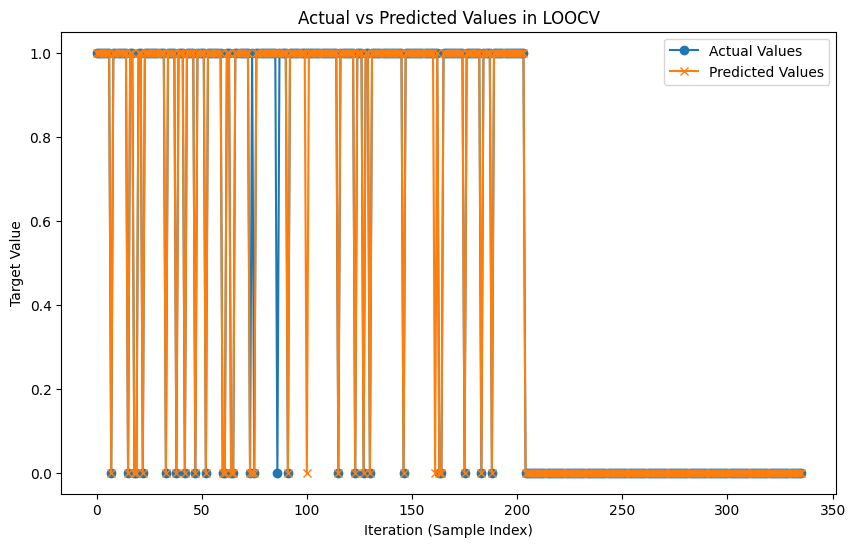

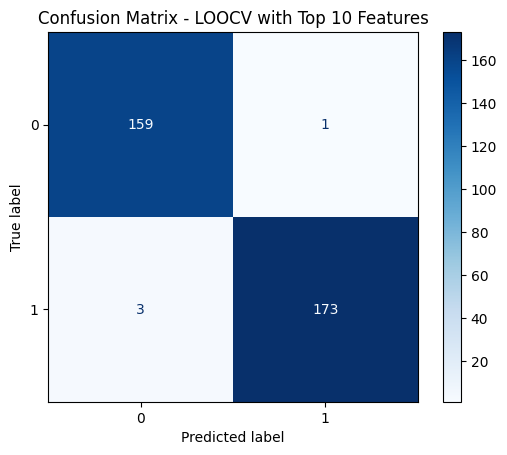

In [113]:
# Definimos x e y directamente
x = data.drop(columns=[target])  # Eliminamos la columna objetivo para obtener las características
y = data[target]  # Definimos la columna objetivo

# Continuamos con el proceso LOOCV y el modelo Decision Tree
from sklearn.model_selection import LeaveOneOut
from sklearn.tree import DecisionTreeClassifier  # Cambiado a DecisionTreeClassifier
from sklearn.metrics import mean_squared_error  # Cambia esta métrica si necesitas otra evaluación
import matplotlib.pyplot as plt

# Configuración de Leave-One-Out
loo = LeaveOneOut()

# Inicializamos el modelo de Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=random_state)  # Cambiado a DecisionTreeClassifier

# Listas para almacenar errores y predicciones de cada iteración
errors = []
actual_values = []
predicted_values = []

# Generamos las divisiones para Leave One Out
for train_index, test_index in loo.split(x):
    # División de los datos en entrenamiento y prueba
    x_trainBase, x_testBase = x.iloc[train_index], x.iloc[test_index]
    y_trainBase, y_testBase = y.iloc[train_index], y.iloc[test_index]
    
    # Entrenamiento del modelo en el conjunto de entrenamiento
    decision_tree_model.fit(x_trainBase, y_trainBase)
    
    # Predicción en el conjunto de prueba
    y_pred = decision_tree_model.predict(x_testBase)
    
    # Errores
    error = mean_squared_error(y_testBase, y_pred)
    errors.append(error)
    
    # Almacenar valores
    actual_values.append(y_testBase.values[0])
    predicted_values.append(y_pred[0])
    
    # Imprimir resultados
    print(f"Valor de fila del test: {test_index}, Actual: {y_testBase.values}, Predicho: {y_pred}, Error: {error}")

# Cálculo del error promedio después de todas las iteraciones
mean_error = sum(errors) / len(errors)
print(f"\nAccuracy: {1-mean_error}")
accuracy.append(1-mean_error)

# Resultado en gráfica
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label="Actual Values", marker='o')
plt.plot(predicted_values, label="Predicted Values", marker='x')
plt.xlabel("Iteration (Sample Index)")
plt.ylabel("Target Value")
plt.title("Actual vs Predicted Values in LOOCV")
plt.legend()
plt.show()

# Matriz de Confusión
conf_matrix = confusion_matrix(actual_values, predicted_values)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - LOOCV with Top 10 Features")
plt.show()



In [114]:
todo_accuracy["decisiontree"] = accuracy
accuracy = []

Arbol de clasificacion con metodo wrapper

In [115]:
# Importar librerías adicionales para SFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Definimos x e y directamente
x = data_clean.drop(columns=[target, 'CASOS', 'NIV_EST', 'EST_CIV', 'EDAD', 'SEXO'])  # Eliminamos columnas innecesarias
y = data_clean[target]  # Columna objetivo

# Configuración de Leave-One-Out
loo = LeaveOneOut()

# Inicializamos el modelo de Random Forest
random_forest_model = RandomForestClassifier(random_state=random_state)  # Modelo base para el wrapper

# Configuración de Sequential Feature Selector con el método wrapper
sfs = SFS(random_forest_model,
          k_features="best",  # Número de características óptimo, puede ajustarse o definirse fijo
          forward=True,       # Selección hacia adelante
          floating=False,     # No utiliza eliminación condicional
          scoring='accuracy', # Métrica de evaluación para la selección de características
          cv=5)               # Validación cruzada interna para evaluar cada conjunto de características

# Realizamos el proceso de selección de características con SFS
sfs = sfs.fit(x, y)
selected_features = list(sfs.k_feature_names_)
print(f"Características seleccionadas con método wrapper: {selected_features}")

# Redefinimos X con las características seleccionadas
x_selected = x[selected_features]

# Listas para almacenar errores y predicciones de cada iteración
errors = []
actual_values = []
predicted_values = []

# Generamos las divisiones para LOOCV con las características seleccionadas
for train_index, test_index in loo.split(x_selected):
    # División de los datos en entrenamiento y prueba
    x_trainClean, x_testClean = x_selected.iloc[train_index], x_selected.iloc[test_index]
    y_trainClean, y_testClean = y.iloc[train_index], y.iloc[test_index]
    
    # Entrenamiento del modelo en el conjunto de entrenamiento
    random_forest_model.fit(x_trainClean, y_trainClean)
    
    # Predicción en el conjunto de prueba
    y_pred = random_forest_model.predict(x_testClean)
    
    # Cálculo del error (1 - Accuracy en este caso) y almacenamiento
    error = 1 - accuracy_score(y_testClean, y_pred)
    errors.append(error)
    
    # Almacenar valores reales y predichos para graficar
    actual_values.append(y_testClean.values[0])
    predicted_values.append(y_pred[0])
    
    # Ejemplo de impresión de resultados en cada iteración
    print(f"Test Index: {test_index}, Actual: {y_testClean.values}, Predicted: {y_pred}, Error: {error}")

# Cálculo del error promedio después de todas las iteraciones
mean_error = sum(errors) / len(errors)
print(f"\nAccuracy después de SFS (wrapper): {1 - mean_error}")

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label="Actual Values", marker='o')
plt.plot(predicted_values, label="Predicted Values", marker='x')
plt.xlabel("Iteration (Sample Index)")
plt.ylabel("Target Value")
plt.title("Actual vs Predicted Values in LOOCV with Wrapper SFS")
plt.legend()
plt.show()

# Matriz de Confusión
conf_matrix = confusion_matrix(actual_values, predicted_values)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - LOOCV with Top 10 Features")
plt.show()



STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

TypeError: 'NoneType' object is not iterable

METODO FILTER


Importancia de las características según la información mutua:
          Feature  Mutual Information
28     UBES_TOTAL            0.658469
0             BAS            0.335790
18           LUC_            0.295346
1     BAS_PERCENT            0.255988
17    LUC_PERCENT            0.214824
4             EOS            0.205159
27            VPM            0.196561
10            HCM            0.193002
12            IDH            0.183327
20  MONOS_PERCENT            0.182526
19          MONOS            0.167110
2            CHCM            0.161415
25            URE            0.144052
5     EOS_PERCENT            0.133572
26            VCM            0.124317
3            CREA            0.117618
8             GOT            0.108193
9              HB            0.106919
15           LINF            0.071844
11           HCTO            0.040320
22          NEUTR            0.032147
16   LINF_PERCENT            0.029518
6          ERITRO            0.028775
7             GLU        

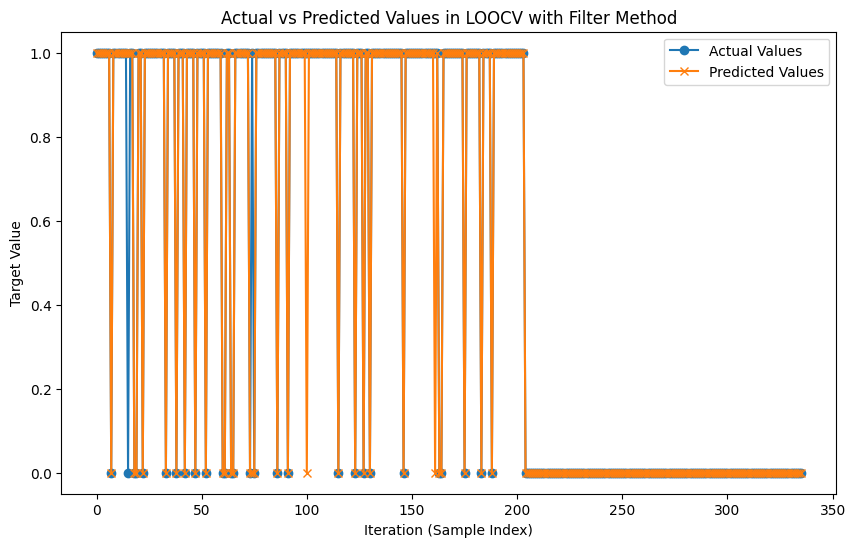

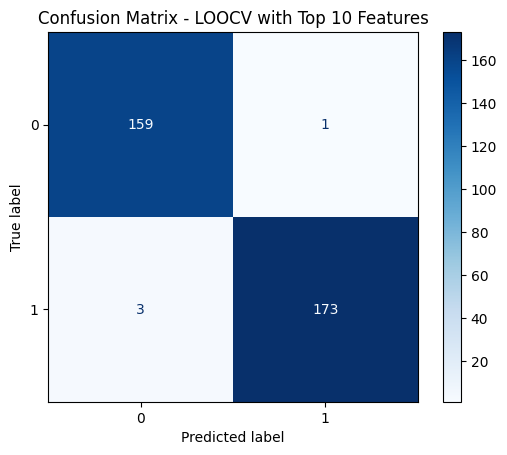

In [116]:
# Importar librerías adicionales para el método filter
from sklearn.feature_selection import mutual_info_classif


# Definimos x e y directamente
x = data_clean.drop(columns=[target, 'CASOS', 'NIV_EST', 'EST_CIV', 'EDAD', 'SEXO'])  # Eliminamos columnas innecesarias
y = data_clean[target]  # Columna objetivo

# Calcular la información mutua entre cada característica y la variable objetivo
mi = mutual_info_classif(x, y)

# Crear un DataFrame para visualizar la importancia de cada característica
importances_df = pd.DataFrame({'Feature': x.columns, 'Mutual Information': mi})
importances_df = importances_df.sort_values(by='Mutual Information', ascending=False)

# Mostrar las características ordenadas por importancia
print("Importancia de las características según la información mutua:")
print(importances_df)

# Seleccionar las características con mayor importancia (por ejemplo, las que tienen valores altos de MI)
# Puedes ajustar el umbral o seleccionar las N características principales
selected_features = importances_df[importances_df['Mutual Information'] > 0.01]['Feature'].tolist()
print(f"Características seleccionadas con método filter: {selected_features}")

# Redefinimos X con las características seleccionadas
x_selected = x[selected_features]

# Configuración de Leave-One-Out
loo = LeaveOneOut()

# Inicializamos el modelo de Random Forest
random_forest_model = RandomForestClassifier(random_state=random_state)

# Listas para almacenar errores y predicciones de cada iteración
errors = []
actual_values = []
predicted_values = []

# Generamos las divisiones para LOOCV con las características seleccionadas
for train_index, test_index in loo.split(x_selected):
    # División de los datos en entrenamiento y prueba
    x_trainClean, x_testClean = x_selected.iloc[train_index], x_selected.iloc[test_index]
    y_trainClean, y_testClean = y.iloc[train_index], y.iloc[test_index]
    
    # Entrenamiento del modelo en el conjunto de entrenamiento
    random_forest_model.fit(x_trainClean, y_trainClean)
    
    # Predicción en el conjunto de prueba
    y_pred = random_forest_model.predict(x_testClean)
    
    # Cálculo del error (1 - Accuracy en este caso) y almacenamiento
    error = 1 - accuracy_score(y_testClean, y_pred)
    errors.append(error)
    
    # Almacenar valores reales y predichos para graficar
    actual_values.append(y_testClean.values[0])
    predicted_values.append(y_pred[0])
    
    # Ejemplo de impresión de resultados en cada iteración
    print(f"Test Index: {test_index}, Actual: {y_testClean.values}, Predicted: {y_pred}, Error: {error}")

# Cálculo del error promedio después de todas las iteraciones
mean_error = sum(errors) / len(errors)
print(f"\nAccuracy después de selección de características (filter): {1 - mean_error}")

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label="Actual Values", marker='o')
plt.plot(predicted_values, label="Predicted Values", marker='x')
plt.xlabel("Iteration (Sample Index)")
plt.ylabel("Target Value")
plt.title("Actual vs Predicted Values in LOOCV with Filter Method")
plt.legend()
plt.show()

# Matriz de Confusión
conf_matrix = confusion_matrix(actual_values, predicted_values)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - LOOCV with Top 10 Features")
plt.show()

Arbol de clasifcación con base de datos original

Valor de fila del test: [0], Actual: [1], Predicho: [1], Error: 0.0
Valor de fila del test: [1], Actual: [1], Predicho: [1], Error: 0.0
Valor de fila del test: [2], Actual: [1], Predicho: [1], Error: 0.0
Valor de fila del test: [3], Actual: [1], Predicho: [1], Error: 0.0
Valor de fila del test: [4], Actual: [1], Predicho: [1], Error: 0.0
Valor de fila del test: [5], Actual: [1], Predicho: [1], Error: 0.0
Valor de fila del test: [6], Actual: [1], Predicho: [1], Error: 0.0
Valor de fila del test: [7], Actual: [0], Predicho: [1], Error: 1.0
Valor de fila del test: [8], Actual: [1], Predicho: [1], Error: 0.0
Valor de fila del test: [9], Actual: [1], Predicho: [1], Error: 0.0
Valor de fila del test: [10], Actual: [1], Predicho: [1], Error: 0.0
Valor de fila del test: [11], Actual: [1], Predicho: [1], Error: 0.0
Valor de fila del test: [12], Actual: [1], Predicho: [1], Error: 0.0
Valor de fila del test: [13], Actual: [1], Predicho: [1], Error: 0.0
Valor de fila del test: [14], Actual: [1], P

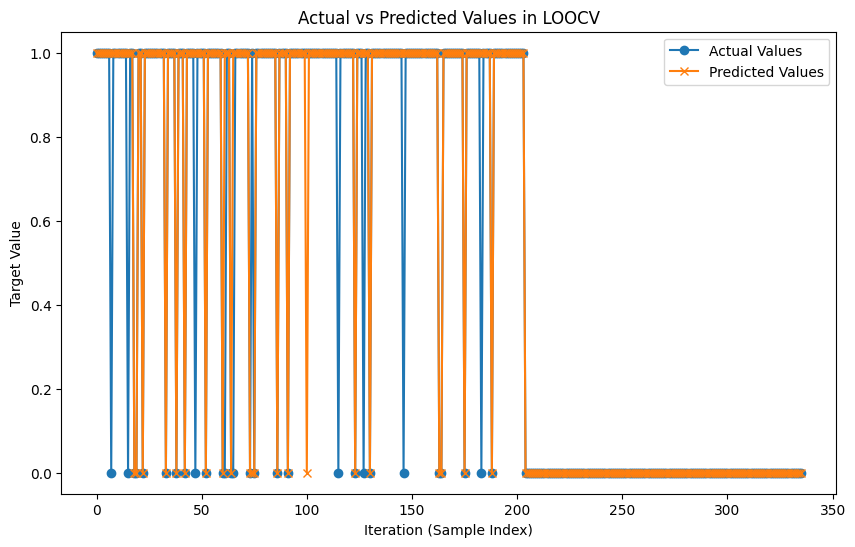

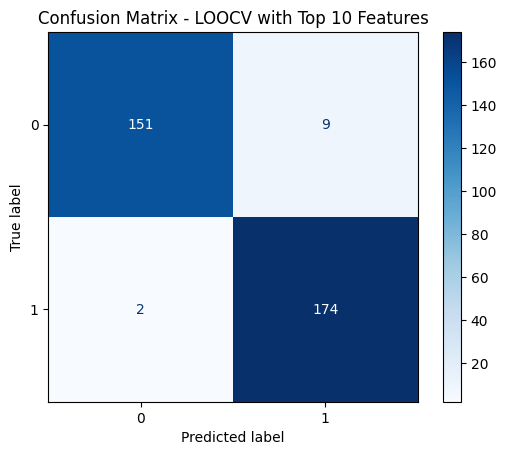

In [117]:
# Definimos x e y directamente
x = data.drop(columns=[target])  # Eliminamos la columna objetivo para obtener las características
y = data[target]  # Definimos la columna objetivo

# Continuamos con el proceso LOOCV y el modelo Random Forest
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier  # Cambia a RandomForestClassifier si es una tarea de clasificación
from sklearn.metrics import mean_squared_error  # Cambia esta métrica si necesitas otra evaluación
import matplotlib.pyplot as plt

# Configuración de Leave-One-Out
loo = LeaveOneOut()

# Inicializamos el modelo de Random Forest
random_forest_model = RandomForestClassifier(random_state=random_state)  # Cambia a RandomForestClassifier para clasificación

# Listas para almacenar errores y predicciones de cada iteración
errors = []
actual_values = []
predicted_values = []

# Generamos las divisiones para Leave One Out
for train_index, test_index in loo.split(x):
    # División de los datos en entrenamiento y prueba
    x_trainBase, x_testBase = x.iloc[train_index], x.iloc[test_index]
    y_trainBase, y_testBase = y.iloc[train_index], y.iloc[test_index]
    
    # Entrenamiento del modelo en el conjunto de entrenamiento
    random_forest_model.fit(x_trainBase, y_trainBase)
    
    # Predicción en el conjunto de prueba
    y_pred = random_forest_model.predict(x_testBase)
    
    # Errores
    error = mean_squared_error(y_testBase, y_pred)
    errors.append(error)
    
    # Almacenar valores
    actual_values.append(y_testBase.values[0])
    predicted_values.append(y_pred[0])
    
    # Imprimir resultados
    print(f"Valor de fila del test: {test_index}, Actual: {y_testBase.values}, Predicho: {y_pred}, Error: {error}")

# Cálculo del error promedio después de todas las iteraciones
mean_error = sum(errors) / len(errors)
print(f"\nAccuracy: {1-mean_error}")
accuracy.append(1-mean_error)

# Resultado en grafíca
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label="Actual Values", marker='o')
plt.plot(predicted_values, label="Predicted Values", marker='x')
plt.xlabel("Iteration (Sample Index)")
plt.ylabel("Target Value")
plt.title("Actual vs Predicted Values in LOOCV")
plt.legend()
plt.show()

# Matriz de Confusión
conf_matrix = confusion_matrix(actual_values, predicted_values)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - LOOCV with Top 10 Features")
plt.show()


Arbol de clasificación con el dataset limpio

Test Index: [0], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [1], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [2], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [3], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [4], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [5], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [6], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [7], Actual: [0], Predicted: [0], Error: 0.0
Test Index: [8], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [9], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [10], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [11], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [12], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [13], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [14], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [15], Actual: [0], Predicted: [1], Error: 1.0
Test Index: [16], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [17], Actual

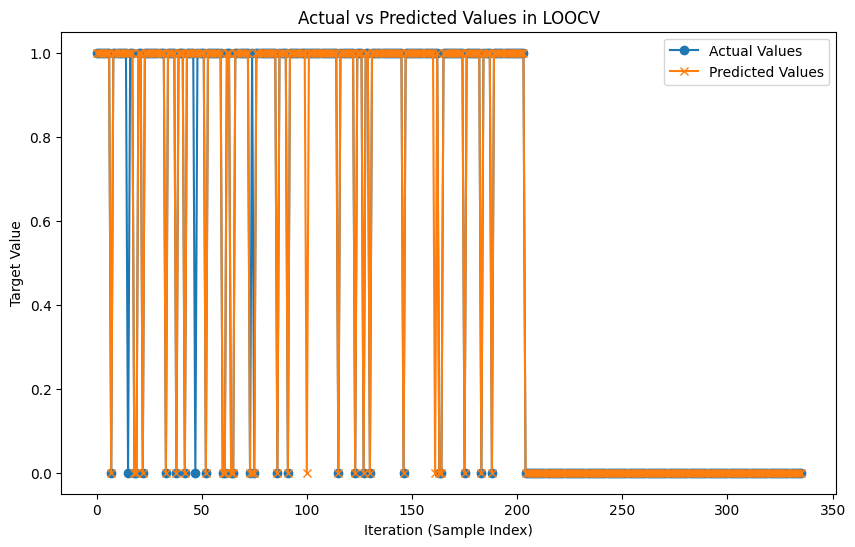

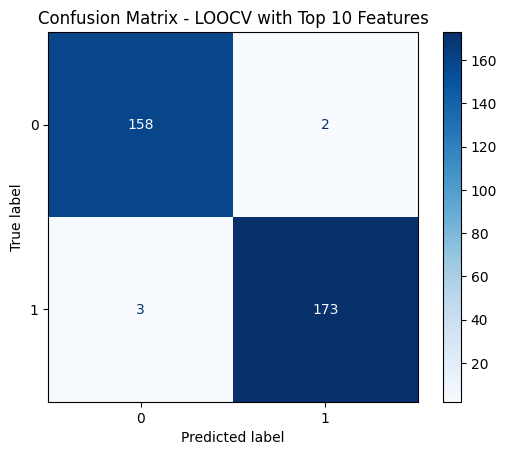

In [118]:
# Definimos x e y directamente
x = data_clean.drop(columns=[target,'CASOS', 'NIV_EST','EST_CIV','EDAD','SEXO'])  # Eliminamos la columna objetivo para obtener las características
y = data_clean[target]  # Definimos la columna objetivo

# Continuamos con el proceso LOOCV y el modelo Random Forest
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier  # Cambia a RandomForestClassifier si es una tarea de clasificación
from sklearn.metrics import mean_squared_error  # Cambia esta métrica si necesitas otra evaluación
import matplotlib.pyplot as plt

# Configuración de Leave-One-Out
loo = LeaveOneOut()

# Inicializamos el modelo de Random Forest
random_forest_model = RandomForestClassifier(random_state=random_state)  # Cambia a RandomForestClassifier para clasificación

# Listas para almacenar errores y predicciones de cada iteración
errors = []
actual_values = []
predicted_values = []

# Generamos las divisiones para LOOCV
for train_index, test_index in loo.split(x):
    # División de los datos en entrenamiento y prueba
    x_trainClean, x_testClean = x.iloc[train_index], x.iloc[test_index]
    y_trainClean, y_testClean = y.iloc[train_index], y.iloc[test_index]
    
    # Entrenamiento del modelo en el conjunto de entrenamiento
    random_forest_model.fit(x_trainClean, y_trainClean)
    
    # Predicción en el conjunto de prueba
    y_pred = random_forest_model.predict(x_testClean)
    
    # Cálculo del error (MSE en este caso) y almacenamiento
    error = mean_squared_error(y_testClean, y_pred)
    errors.append(error)
    
    # Almacenar valores reales y predichos para graficar
    actual_values.append(y_testClean.values[0])
    predicted_values.append(y_pred[0])
    
    # Ejemplo de impresión de resultados en cada iteración
    print(f"Test Index: {test_index}, Actual: {y_testClean.values}, Predicted: {y_pred}, Error: {error}")

# Cálculo del error promedio después de todas las iteraciones
mean_error = sum(errors) / len(errors)
print(f"\nAccuracy: {1-mean_error}")
accuracy.append(1-mean_error)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label="Actual Values", marker='o')
plt.plot(predicted_values, label="Predicted Values", marker='x')
plt.xlabel("Iteration (Sample Index)")
plt.ylabel("Target Value")
plt.title("Actual vs Predicted Values in LOOCV")
plt.legend()
plt.show()

# Matriz de Confusión
conf_matrix = confusion_matrix(actual_values, predicted_values)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - LOOCV with Top 10 Features")
plt.show()

Proceso de obtención de las variables más importantes a la hora de predecir

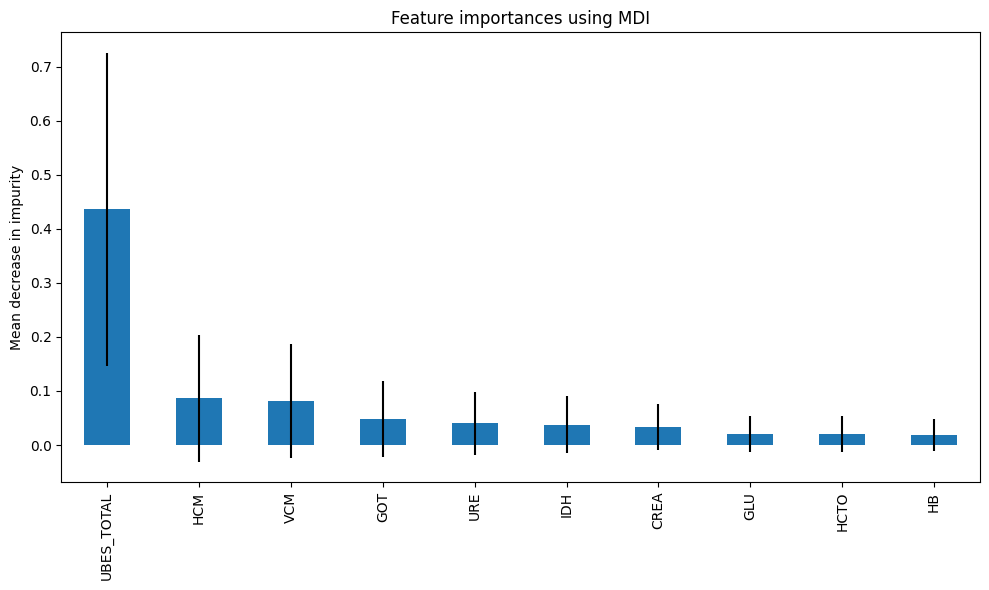

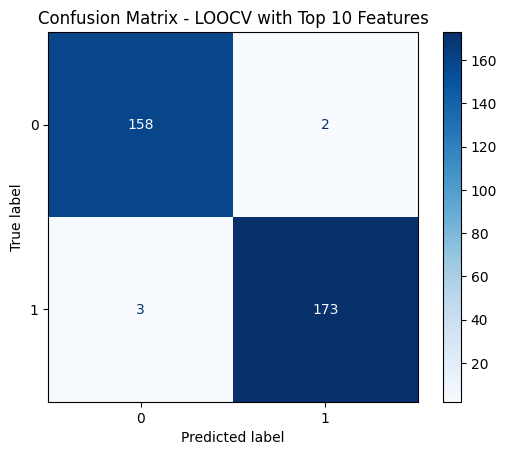

In [119]:
import numpy as np

# Importancia de las características
importances = random_forest_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest_model.estimators_], axis=0)

# Convertimos std a una Serie de pandas para alinear índices
std = pd.Series(std, index=x.columns)
forest_importances = pd.Series(importances, index=x.columns)

# Selección de las 10 variables más importantes
forest_importances = forest_importances.nlargest(10)
std = std[forest_importances.index]  # Seleccionamos la desviación estándar correspondiente

# mostramos en grafica las 10 mas importantes
fig, ax = plt.subplots(figsize=(10, 6))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

# Matriz de Confusión
conf_matrix = confusion_matrix(actual_values, predicted_values)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - LOOCV with Top 10 Features")
plt.show()



In [120]:
# Importancia de las características
importances = random_forest_model.feature_importances_
forest_importances = pd.Series(importances, index=x.columns)

# Selección de las 10 características más importantes
top_10 = forest_importances.nlargest(10).index

# Crear un nuevo DataFrame con solo las 10 características más importantes y la columna objetivo
data_clean_top_10 = data_clean[top_10.tolist() + [target]]

# Mostrar el nuevo DataFrame
data_clean_top_10.head()


,UBES_TOTAL,HCM,VCM,GOT,URE,IDH,CREA,GLU,HCTO,HB,Bebedor_Riesgo
0,36.0,31.2,89.5,25.0,35.0,14.3,0.97,93.0,50.5,17.6,1
1,28.0,33.4,98.9,17.0,32.0,14.0,0.65,81.0,41.3,14.0,1
2,168.0,31.4,94.9,18.0,37.0,13.4,1.02,90.0,43.4,14.3,1
3,105.0,32.2,102.9,21.0,23.0,13.8,0.71,94.0,50.4,15.8,1
4,84.0,32.3,94.0,146.0,30.0,14.5,0.88,89.0,43.0,14.8,1


Arbol de clasifación con las 10 mejores

C:\Users\javid\AppData\Local\Temp\ipykernel_1848\2243615517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean_top_10[target] = pd.to_numeric(data_clean_top_10[target], errors='coerce')


Test Index: [0], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [1], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [2], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [3], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [4], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [5], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [6], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [7], Actual: [0], Predicted: [0], Error: 0.0
Test Index: [8], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [9], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [10], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [11], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [12], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [13], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [14], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [15], Actual: [0], Predicted: [0], Error: 0.0
Test Index: [16], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [17], Actual

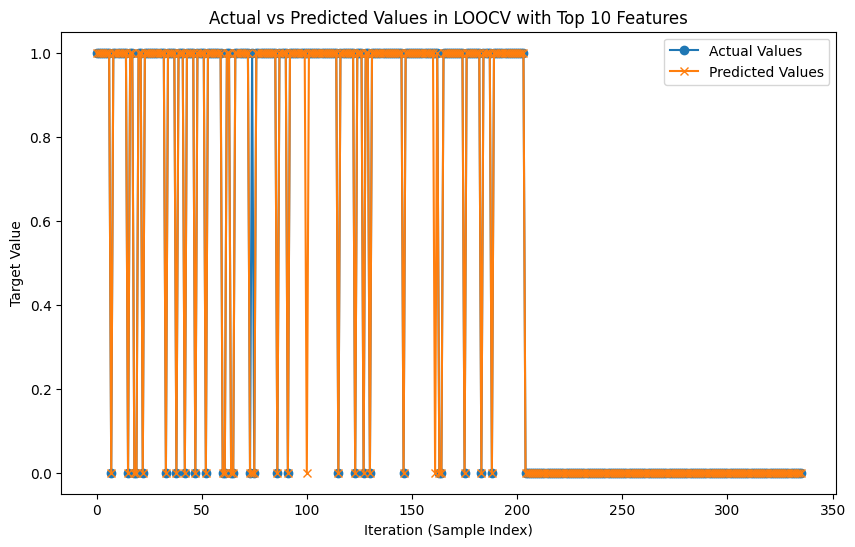

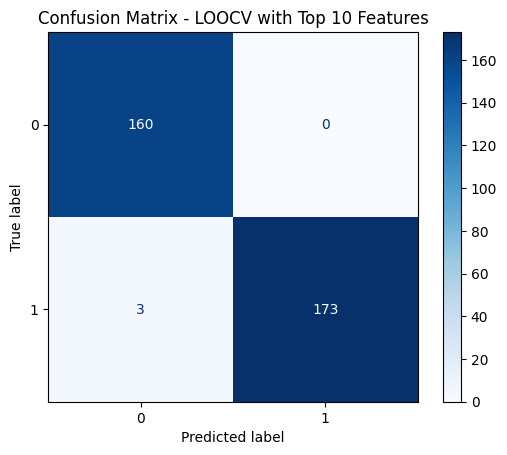

In [121]:
# Convertimos la columna objetivo a numérico, si es necesario
data_clean_top_10[target] = pd.to_numeric(data_clean_top_10[target], errors='coerce')

# Definimos x e y directamente para el nuevo DataFrame reducido
x = data_clean_top_10.drop(columns=[target])  # Eliminamos la columna objetivo para obtener las características
y = data_clean_top_10[target]  # Definimos la columna objetivo

# Configuración de Leave-One-Out
loo = LeaveOneOut()

# Inicializamos el modelo de Random Forest
random_forest_model = RandomForestClassifier(random_state=random_state)

# Listas para almacenar errores, valores reales y predicciones
errors = []
actual_values = []
predicted_values = []

# Generamos las divisiones para LOOCV
for train_index, test_index in loo.split(x):
    # División de los datos en entrenamiento y prueba
    x_trainClean10, x_testClean10 = x.iloc[train_index], x.iloc[test_index]
    y_trainClean10, y_testClean10 = y.iloc[train_index], y.iloc[test_index]
    
    # Entrenamiento del modelo en el conjunto de entrenamiento
    random_forest_model.fit(x_trainClean10, y_trainClean10)
    
    # Predicción en el conjunto de prueba
    y_pred = random_forest_model.predict(x_testClean10)
    
    # Cálculo del error (MSE en este caso) y almacenamiento
    error = mean_squared_error(y_testClean10, y_pred)
    errors.append(error)
    
    # Almacenar valores reales y predichos para graficar
    actual_values.append(y_testClean10.values[0])
    predicted_values.append(y_pred[0])
    
    # Ejemplo de impresión de resultados en cada iteración
    print(f"Test Index: {test_index}, Actual: {y_testClean10.values}, Predicted: {y_pred}, Error: {error}")

# Cálculo del error promedio después de todas las iteraciones
mean_error = sum(errors) / len(errors)
print(f"\nAccuracy: {1 - mean_error}")

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label="Actual Values", marker='o')
plt.plot(predicted_values, label="Predicted Values", marker='x')
plt.xlabel("Iteration (Sample Index)")
plt.ylabel("Target Value")
plt.title("Actual vs Predicted Values in LOOCV with Top 10 Features")
plt.legend()
plt.show()

# Matriz de Confusión
conf_matrix = confusion_matrix(actual_values, predicted_values)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - LOOCV with Top 10 Features")
plt.show()

In [122]:
accuracy

[np.float64(0.9672619047619048), np.float64(0.9851190476190477)]

In [123]:
todo_accuracy["randomforest"] = accuracy
accuracy = []

RED BAYESIANA

Red bayesiana con base de datos original

Test Index: [0], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [1], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [2], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [3], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [4], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [5], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [6], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [7], Actual: [0], Predicted: [0], Error: 0.0
Test Index: [8], Actual: [1], Predicted: [0], Error: 1.0
Test Index: [9], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [10], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [11], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [12], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [13], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [14], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [15], Actual: [0], Predicted: [1], Error: 1.0
Test Index: [16], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [17], Actual

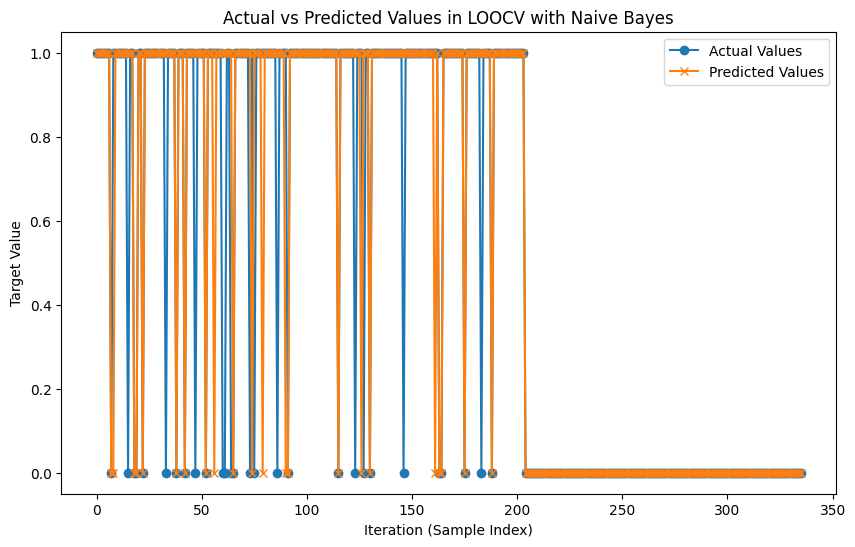

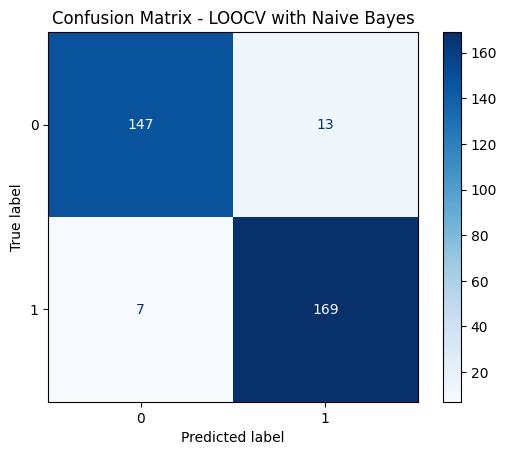

In [131]:
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Definimos x e y directamente
x = data.drop(columns=[target])
y = data[target]

# Imputamos valores faltantes en x
imputer = SimpleImputer(strategy="mean")  # Cambia la estrategia si prefieres la mediana o la moda
x = imputer.fit_transform(x)

# Configuración de Leave-One-Out y el modelo de Naive Bayes
loo = LeaveOneOut()
bayesian_model = GaussianNB()

# Listas para almacenar errores, valores reales y predicciones de cada iteración
errors = []
actual_values = []
predicted_values = []

# Generamos las divisiones para LOOCV
for train_index, test_index in loo.split(x):
    # División de los datos en entrenamiento y prueba
    x_trainBase, x_testBase = x[train_index], x[test_index]
    y_trainBase, y_testBase = y.iloc[train_index], y.iloc[test_index]
    
    # Entrenamiento del modelo
    bayesian_model.fit(x_trainBase, y_trainBase)
    
    # Predicción en el conjunto de prueba
    y_pred = bayesian_model.predict(x_testBase)
    
    # Cálculo del error cuadrático medio (MSE) y almacenamiento
    error = mean_squared_error(y_testBase, y_pred)
    errors.append(error)
    
    # Almacenar valores reales y predichos para graficar
    actual_values.append(y_testBase.values[0])
    predicted_values.append(y_pred[0])
    
    # Ejemplo de impresión de resultados en cada iteración
    print(f"Test Index: {test_index}, Actual: {y_testBase.values}, Predicted: {y_pred}, Error: {error}")

# Cálculo del error promedio y precisión después de todas las iteraciones
mean_error = sum(errors) / len(errors)
accuracy = 1 - mean_error
print(f"\nAccuracy (1 - Mean Error): {accuracy}")

# Graficar los resultados de valores reales vs predichos
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label="Actual Values", marker='o')
plt.plot(predicted_values, label="Predicted Values", marker='x')
plt.xlabel("Iteration (Sample Index)")
plt.ylabel("Target Value")
plt.title("Actual vs Predicted Values in LOOCV with Naive Bayes")
plt.legend()
plt.show()

# Matriz de Confusión
conf_matrix = confusion_matrix(actual_values, predicted_values)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - LOOCV with Naive Bayes")
plt.show()



In [ ]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CASOS           336 non-null    int64  
 1   NIV_EST         336 non-null    int64  
 2   EST_CIV         336 non-null    int64  
 3   SEXO            336 non-null    float64
 4   EDAD            336 non-null    float64
 5   BAS             336 non-null    float64
 6   BAS_PERCENT     336 non-null    float64
 7   CHCM            336 non-null    float64
 8   CREA            336 non-null    float64
 9   EOS             336 non-null    float64
 10  EOS_PERCENT     336 non-null    float64
 11  ERITRO          336 non-null    float64
 12  GLU             336 non-null    float64
 13  GOT             336 non-null    float64
 14  HB              336 non-null    float64
 15  HCM             336 non-null    float64
 16  HCTO            336 non-null    float64
 17  IDH             336 non-null    flo

Red Bayesiana con base de datos limpia

Test Index: [0], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [1], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [2], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [3], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [4], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [5], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [6], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [7], Actual: [0], Predicted: [1], Error: 1.0
Test Index: [8], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [9], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [10], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [11], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [12], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [13], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [14], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [15], Actual: [0], Predicted: [1], Error: 1.0
Test Index: [16], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [17], Actual

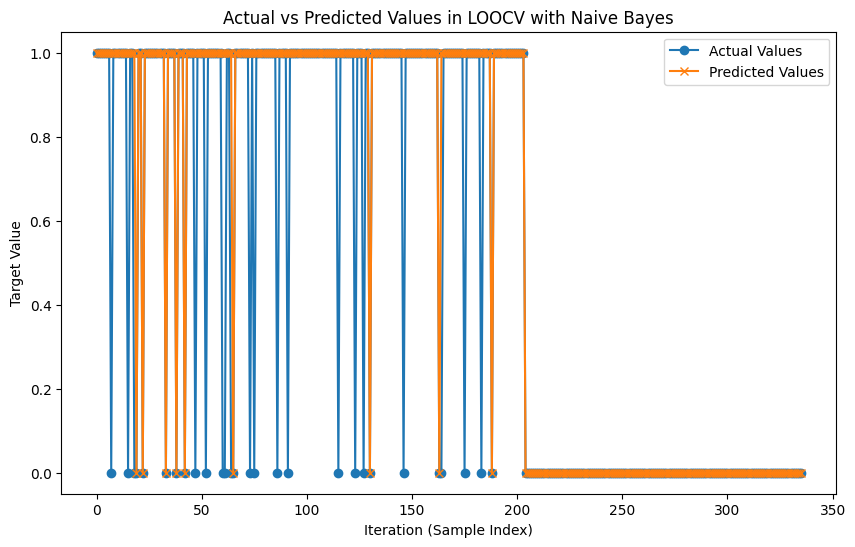

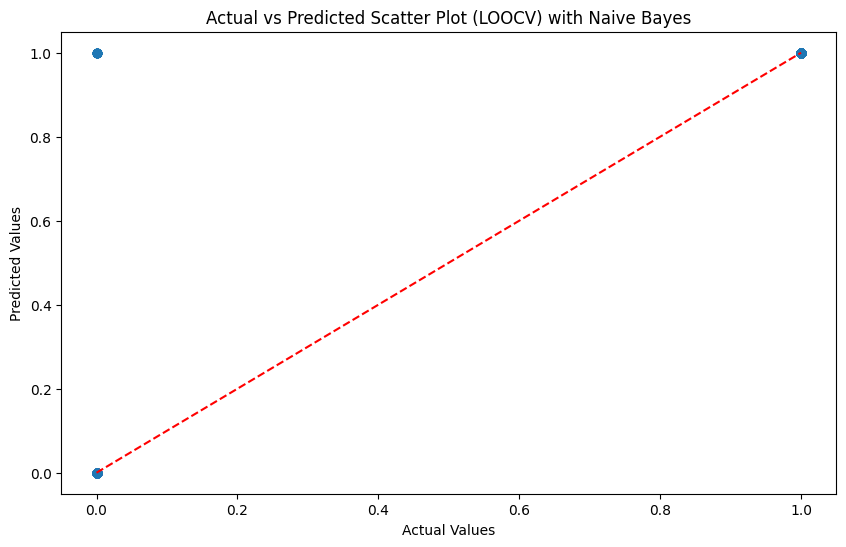

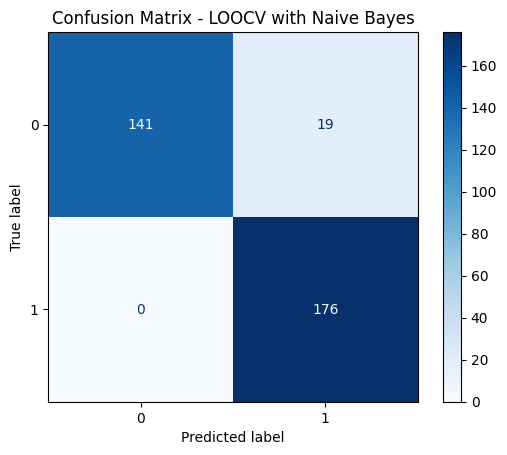

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Definimos x e y directamente para el DataFrame limpio y preprocesado
x = data_clean.drop(columns=[target])  # Eliminamos la columna objetivo para obtener las características
y = data_clean[target]  # Definimos la columna objetivo

# Configuración de Leave-One-Out y el modelo de Naive Bayes
loo = LeaveOneOut()
bayesian_model = GaussianNB()

# Listas para almacenar errores, valores reales y predicciones
errors = []
actual_values = []
predicted_values = []

# Generamos las divisiones para LOOCV
for train_index, test_index in loo.split(x):
    # División de los datos en entrenamiento y prueba
    x_trainClean, x_testClean = x.iloc[train_index], x.iloc[test_index]
    y_trainClean, y_testClean = y.iloc[train_index], y.iloc[test_index]
    
    # Entrenamiento del modelo en el conjunto de entrenamiento
    bayesian_model.fit(x_trainClean, y_trainClean)
    
    # Predicción en el conjunto de prueba
    y_pred = bayesian_model.predict(x_testClean)
    
    # Cálculo del error cuadrático medio (MSE) y almacenamiento
    error = mean_squared_error(y_testClean, y_pred)
    errors.append(error)
    
    # Almacenar valores reales y predichos para graficar
    actual_values.append(y_testClean.values[0])
    predicted_values.append(y_pred[0])
    
    # Ejemplo de impresión de resultados en cada iteración
    print(f"Test Index: {test_index}, Actual: {y_testClean.values}, Predicted: {y_pred}, Error: {error}")

# Cálculo del error promedio y precisión después de todas las iteraciones
mean_error = sum(errors) / len(errors)
accuracy = 1 - mean_error
print(f"\nAccuracy (1 - Mean Error): {accuracy}")

# Graficar los resultados de valores reales vs predichos
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label="Actual Values", marker='o')
plt.plot(predicted_values, label="Predicted Values", marker='x')
plt.xlabel("Iteration (Sample Index)")
plt.ylabel("Target Value")
plt.title("Actual vs Predicted Values in LOOCV with Naive Bayes")
plt.legend()
plt.show()


# Matriz de Confusión
conf_matrix = confusion_matrix(actual_values, predicted_values)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - LOOCV with Naive Bayes")
plt.show()


Red bayesiana con SFS

Test Index: [0], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [1], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [2], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [3], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [4], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [5], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [6], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [7], Actual: [0], Predicted: [1], Error: 1.0
Test Index: [8], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [9], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [10], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [11], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [12], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [13], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [14], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [15], Actual: [0], Predicted: [1], Error: 1.0
Test Index: [16], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [17], Actual

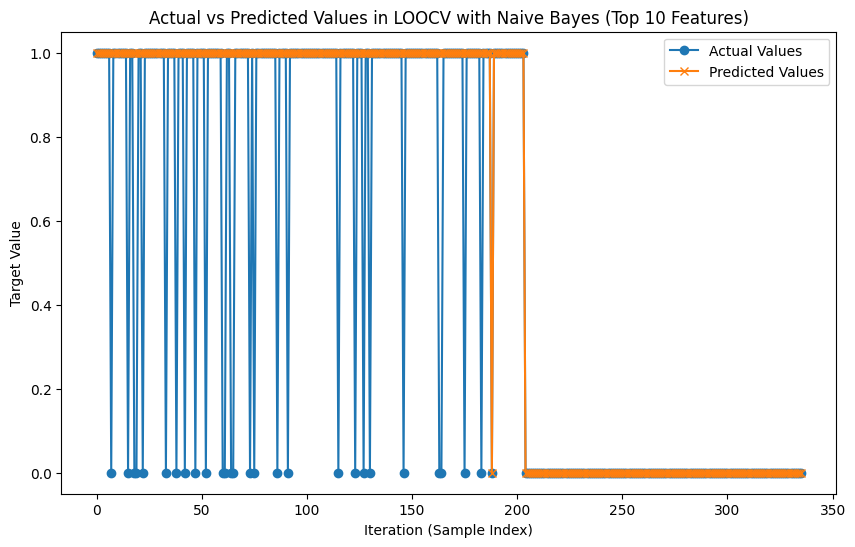

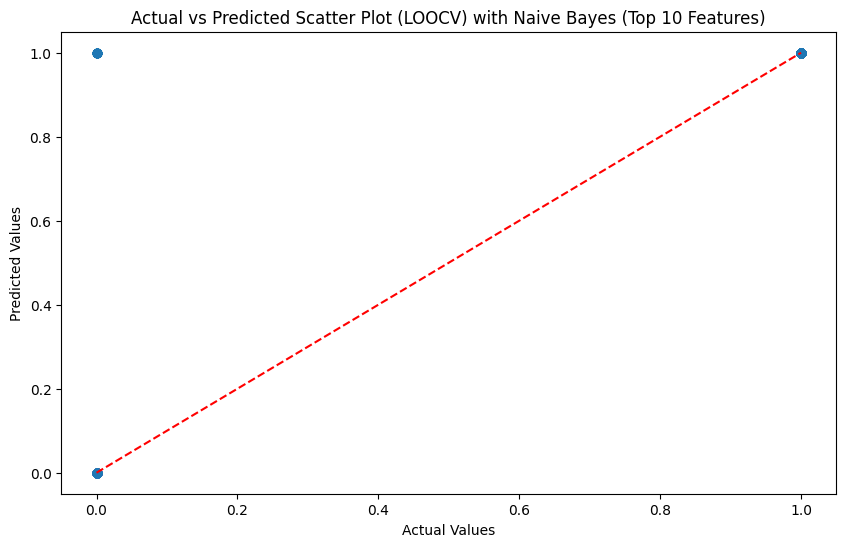

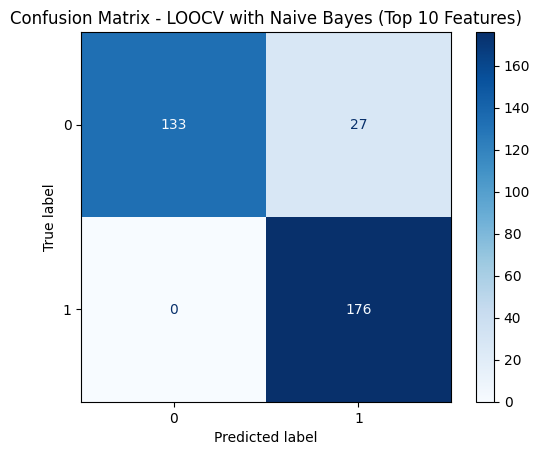

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Definimos x e y directamente con la base de datos limpia y preprocesada
x = data_clean.drop(columns=[target])  # Eliminamos la columna objetivo para obtener las características
y = data_clean[target]  # Definimos la columna objetivo

# Selección de características: Sequential Forward Selection (SFS)
# Usamos un modelo base como LinearRegression para seleccionar las variables (no es el modelo final)
sfs = SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select="auto", direction="forward")
sfs.fit(x, y)
selected_features = x.columns[sfs.get_support()]  # Obtenemos los nombres de las columnas seleccionadas

# Crear DataFrame reducido solo con las características seleccionadas
x_sfs = x[selected_features]

# Calculamos la correlación de Pearson y seleccionamos las 10 variables más correlacionadas
correlations = x_sfs.corrwith(y)
top_features = correlations.abs().sort_values(ascending=False).head(10).index
x_selected = x_sfs[top_features]

# Configuración de Leave-One-Out y el modelo de Naive Bayes
loo = LeaveOneOut()
bayesian_model = GaussianNB()

# Listas para almacenar errores, valores reales y predicciones de cada iteración
errors = []
actual_values = []
predicted_values = []

# Generamos las divisiones para LOOCV
for train_index, test_index in loo.split(x_selected):
    # División de los datos en entrenamiento y prueba
    x_trainClean, x_testClean = x_selected.iloc[train_index], x_selected.iloc[test_index]
    y_trainClean, y_testClean = y.iloc[train_index], y.iloc[test_index]
    
    # Entrenamiento del modelo en el conjunto de entrenamiento
    bayesian_model.fit(x_trainClean, y_trainClean)
    
    # Predicción en el conjunto de prueba
    y_pred = bayesian_model.predict(x_testClean)
    
    # Cálculo del error cuadrático medio (MSE) y almacenamiento
    error = mean_squared_error(y_testClean, y_pred)
    errors.append(error)
    
    # Almacenar valores reales y predichos para graficar
    actual_values.append(y_testClean.values[0])
    predicted_values.append(y_pred[0])
    
    # Ejemplo de impresión de resultados en cada iteración
    print(f"Test Index: {test_index}, Actual: {y_testClean.values}, Predicted: {y_pred}, Error: {error}")

# Cálculo del error promedio y precisión después de todas las iteraciones
mean_error = sum(errors) / len(errors)
accuracy = 1 - mean_error
print(f"\nAccuracy (1 - Mean Error): {accuracy}")

# Graficar los resultados de valores reales vs predichos
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label="Actual Values", marker='o')
plt.plot(predicted_values, label="Predicted Values", marker='x')
plt.xlabel("Iteration (Sample Index)")
plt.ylabel("Target Value")
plt.title("Actual vs Predicted Values in LOOCV with Naive Bayes (Top 10 Features)")
plt.legend()
plt.show()

# Matriz de Confusión
conf_matrix = confusion_matrix(actual_values, predicted_values)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - LOOCV with Naive Bayes (Top 10 Features)")
plt.show()


Red bayesiana con las 10 mejores variables

C:\Users\javid\AppData\Local\Temp\ipykernel_1848\1088981524.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean_top_10[target] = pd.to_numeric(data_clean_top_10[target], errors='coerce')


Test Index: [0], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [1], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [2], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [3], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [4], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [5], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [6], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [7], Actual: [0], Predicted: [0], Error: 0.0
Test Index: [8], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [9], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [10], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [11], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [12], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [13], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [14], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [15], Actual: [0], Predicted: [1], Error: 1.0
Test Index: [16], Actual: [1], Predicted: [1], Error: 0.0
Test Index: [17], Actual

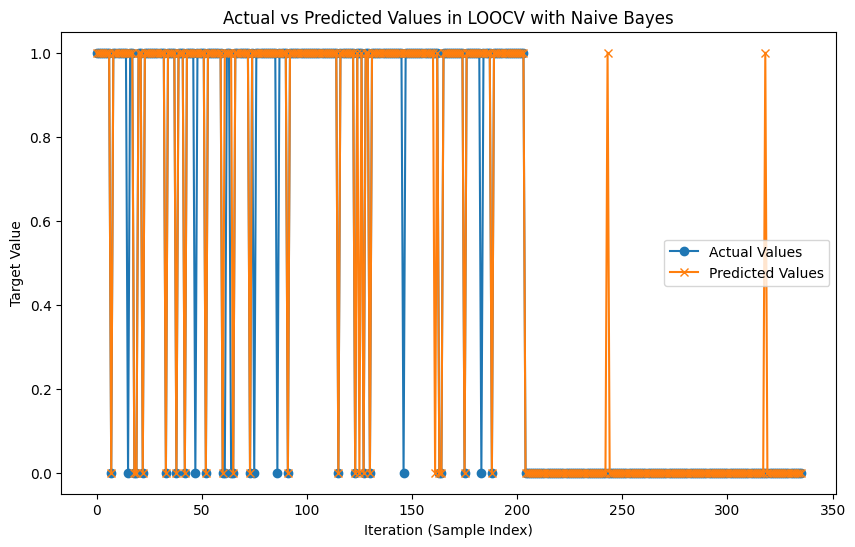

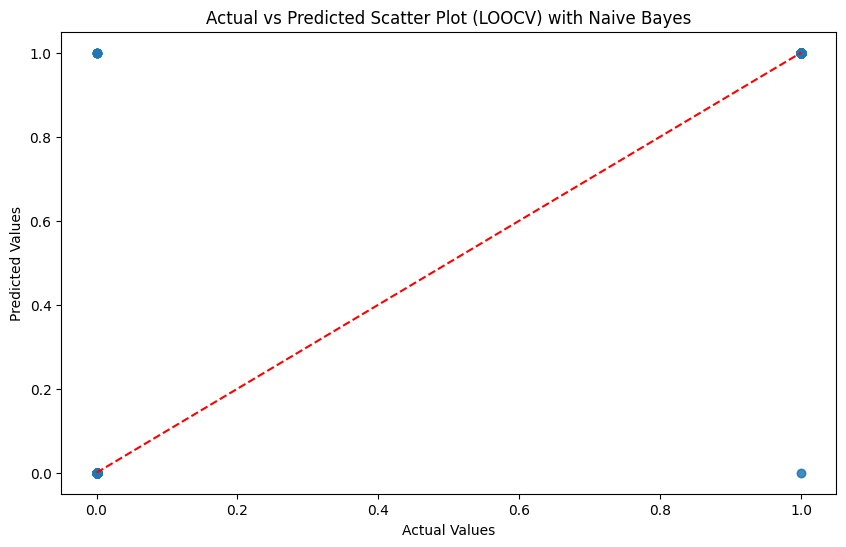

In [136]:
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Convertimos la columna objetivo a numérico, si es necesario
data_clean_top_10[target] = pd.to_numeric(data_clean_top_10[target], errors='coerce')

# Definimos x e y directamente para el nuevo DataFrame reducido
x = data_clean_top_10.drop(columns=[target])  # Eliminamos la columna objetivo para obtener las características
y = data_clean_top_10[target]  # Definimos la columna objetivo

# Imputamos valores faltantes en x con la media de cada columna
imputer = SimpleImputer(strategy="mean")
x = imputer.fit_transform(x)

# Configuración de Leave-One-Out
loo = LeaveOneOut()

# Inicializamos el modelo de Naive Bayes
bayesian_model = GaussianNB()

# Listas para almacenar errores, valores reales y predicciones de cada iteración
errors = []
actual_values = []
predicted_values = []

# Generamos las divisiones para LOOCV
for train_index, test_index in loo.split(x):
    # División de los datos en entrenamiento y prueba
    x_trainClean10, x_testClean10 = x[train_index], x[test_index]
    y_trainClean10, y_testClean10 = y.iloc[train_index], y.iloc[test_index]
    
    # Entrenamiento del modelo en el conjunto de entrenamiento
    bayesian_model.fit(x_trainClean10, y_trainClean10)
    
    # Predicción en el conjunto de prueba
    y_pred = bayesian_model.predict(x_testClean10)
    
    # Cálculo del error cuadrático medio (MSE) y almacenamiento
    error = mean_squared_error(y_testClean10, y_pred)
    errors.append(error)
    
    # Almacenar valores reales y predichos para graficar
    actual_values.append(y_testClean10.values[0])
    predicted_values.append(y_pred[0])
    
    # Ejemplo de impresión de resultados en cada iteración
    print(f"Test Index: {test_index}, Actual: {y_testClean10.values}, Predicted: {y_pred}, Error: {error}")

# Cálculo del error promedio y precisión después de todas las iteraciones
mean_error = sum(errors) / len(errors)
accuracy = 1 - mean_error
print(f"\nAccuracy (1 - Mean Error): {accuracy}")

# Graficar los resultados de valores reales vs predichos
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label="Actual Values", marker='o')
plt.plot(predicted_values, label="Predicted Values", marker='x')
plt.xlabel("Iteration (Sample Index)")
plt.ylabel("Target Value")
plt.title("Actual vs Predicted Values in LOOCV with Naive Bayes")
plt.legend()
plt.show()

# Gráfico de dispersión de valores reales vs valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(actual_values, predicted_values, alpha=0.6)
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], 'r--')  # Línea de referencia
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Scatter Plot (LOOCV) with Naive Bayes")
plt.show()


In [ ]:
errores

[0.059523809523809534, 0.05654761904761907, 0.0357142857142857]

In [ ]:
todos_errores.append(errores)
print(todos_errores)
errores = []

[[np.float64(0.03273809523809524), np.float64(0.01488095238095238), np.float64(0.008928571428571428)], [0.059523809523809534, 0.05654761904761907, 0.0357142857142857], [np.float64(0.011904761904761904), 0.059523809523809534, 0.05654761904761907, 0.0357142857142857], [0.059523809523809534, 0.05654761904761907, 0.0357142857142857], [0.059523809523809534, 0.05654761904761907, 0.0357142857142857]]
